# Bulding ML pipeline for Reactor data

**Course: Applied AI in Chemical and Process Engineering**


**Week 3/4**

This notebook witll build a pipeline to prepare data and develop an ML algorithm

Content:

Part 1

*   Data loading
*   Data exploration
*   Quality Checks
*   Visualization

Part 2
*   Normalization
*   Model training, validation and testing
*   Predictions
*   Optimization

In [25]:
# Load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer

# Data Preperation


In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/reactor.csv')

In [27]:
# prompt: list all columns

df.columns

Index(['Temperature (°C)', 'Pressure (atm)', 'Catalyst Concentration (wt%)',
       'Feed Flow Rate (L/min)', 'Yield (%)', 'Recorded By'],
      dtype='object')

In [28]:
# Print data table
df.head(10)

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%),Recorded By
0,205.0,5.00,2.4,9.50,70.00,Nuwan
1,200.0,5.00,2.1,9.00,70.00,Mali
2,225.0,6.00,3.0,10.25,75.75,Nuwan
3,200.0,6.00,2.4,10.50,70.00,Kavi
4,220.0,6.50,3.0,9.50,95.00,Nuwan
5,210.0,4.00,4.0,11.75,73.42,Janith
6,180.0,5.00,3.1,11.25,70.00,Mali
7,190.0,4.75,4.0,9.25,82.51,Janith
8,220.0,5.50,2.2,10.25,71.12,Janith
9,195.0,6.25,2.9,11.50,70.90,Kavi


In [29]:
# Size of the data table

df.shape

(80, 6)

# Data Cleaning

In [30]:
# Remove the text column as it is not important for models

dfnum=df[['Temperature (°C)',
'Pressure (atm)', 'Catalyst Concentration (wt%)','Feed Flow Rate (L/min)',
'Yield (%)']]

dfnum

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
0,205.0,5.00,2.4,9.50,70.00
1,200.0,5.00,2.1,9.00,70.00
2,225.0,6.00,3.0,10.25,75.75
3,200.0,6.00,2.4,10.50,70.00
4,220.0,6.50,3.0,9.50,95.00
...,...,...,...,...,...
75,400.0,4.50,3.0,9.00,NaN
76,150.0,6.00,12.0,13.00,NaN
77,250.0,6.00,2.2,10.50,95.00
78,215.0,4.00,2.6,10.25,95.00


## Check for missing data

In [31]:
print(dfnum.isna().sum())

Temperature (°C)                1
Pressure (atm)                  1
Catalyst Concentration (wt%)    0
Feed Flow Rate (L/min)          0
Yield (%)                       3
dtype: int64


## Fill the missing data wiht median using imputer

In [32]:
imputer = SimpleImputer(strategy='median')

dfnum2 = pd.DataFrame(imputer.fit_transform(dfnum), columns=dfnum.columns)
print(dfnum2.isna().sum())

print (dfnum2.shape)

Temperature (°C)                0
Pressure (atm)                  0
Catalyst Concentration (wt%)    0
Feed Flow Rate (L/min)          0
Yield (%)                       0
dtype: int64
(80, 5)


In [33]:
dfnum2

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
0,205.0,5.00,2.4,9.50,70.00
1,200.0,5.00,2.1,9.00,70.00
2,225.0,6.00,3.0,10.25,75.75
3,200.0,6.00,2.4,10.50,70.00
4,220.0,6.50,3.0,9.50,95.00
...,...,...,...,...,...
75,400.0,4.50,3.0,9.00,76.68
76,150.0,6.00,12.0,13.00,76.68
77,250.0,6.00,2.2,10.50,95.00
78,215.0,4.00,2.6,10.25,95.00


## Check for duplicates

In [34]:
print("Number of duplicate rows:", dfnum2.duplicated().sum())

print("shape with duplciates:", dfnum2.shape)

Number of duplicate rows: 3
shape with duplciates: (80, 5)


In [35]:
dfnum3=dfnum2.drop_duplicates()

print("shape without duplciates:", dfnum3.shape)

shape without duplciates: (77, 5)


## Summary Stats

In [36]:
# prompt: print summary stats of df3

dfnum3.describe()

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,225.259740,5.542208,3.446753,9.961039,82.135714
std,34.867193,0.889821,1.311045,1.276086,11.050285
min,150.000000,4.000000,2.000000,8.000000,70.000000
25%,200.000000,4.750000,2.600000,9.000000,70.900000
50%,225.000000,5.500000,3.200000,10.250000,76.680000
75%,245.000000,6.250000,4.000000,11.000000,95.000000
max,400.000000,7.000000,12.000000,13.000000,95.000000


# Data Visualization

## Data Visualization with Box Plot

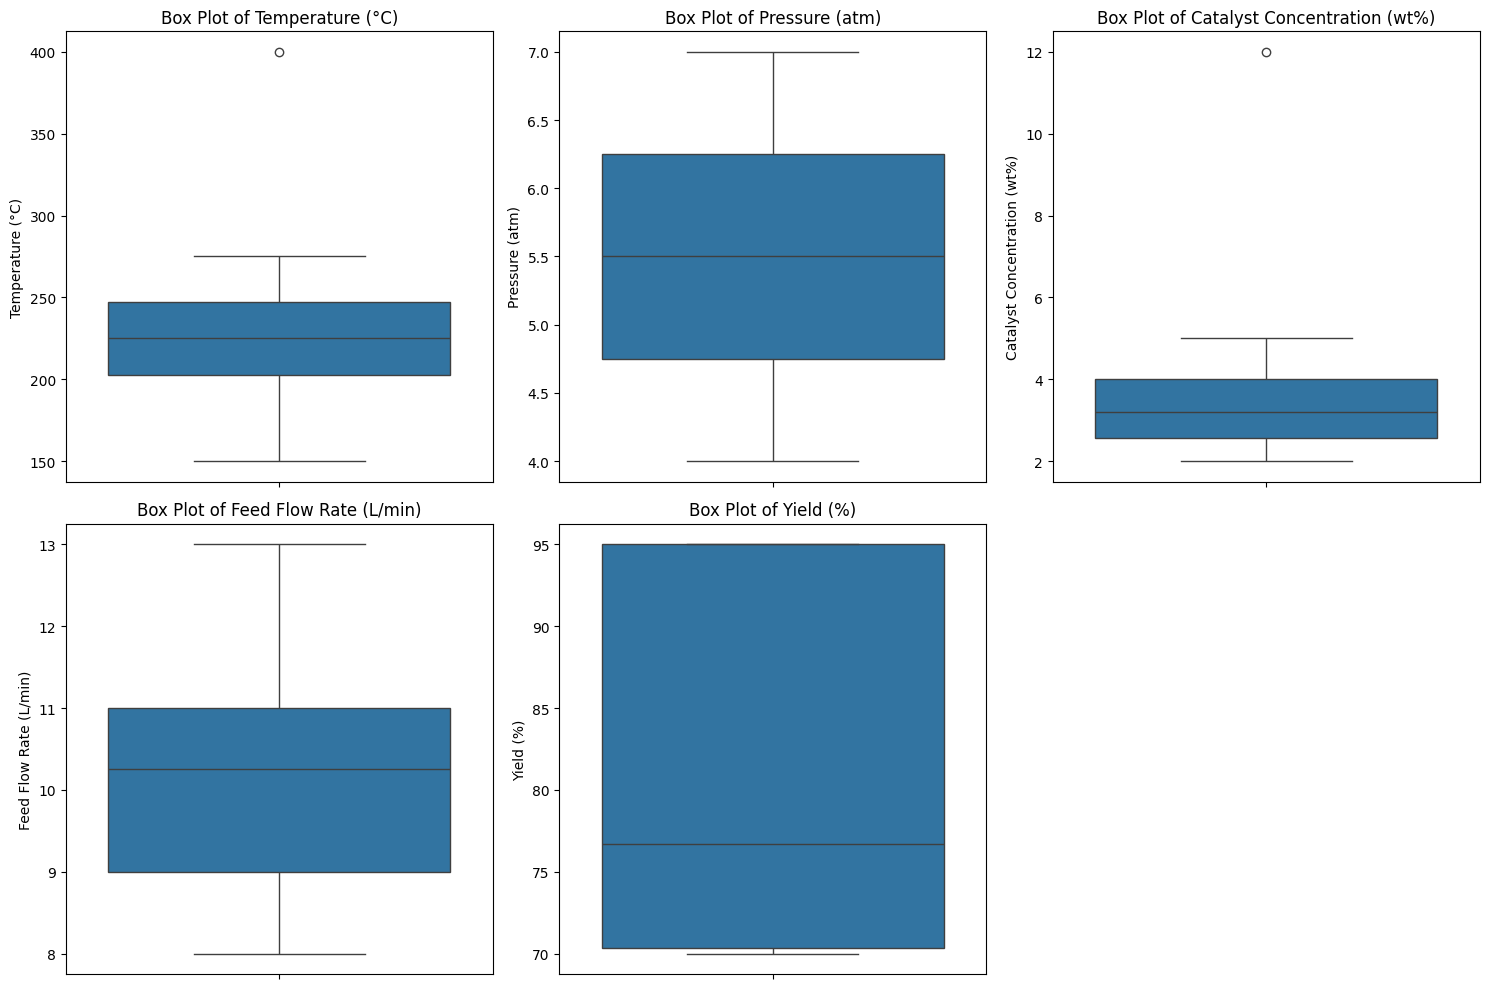

In [37]:
# prompt: create box plots for all variables in multiple plots in single figure. show outliers

plt.figure(figsize=(15, 10))
for i, var in enumerate(dfnum3.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[var], showfliers=True)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

## Data Visualization with Violine plot

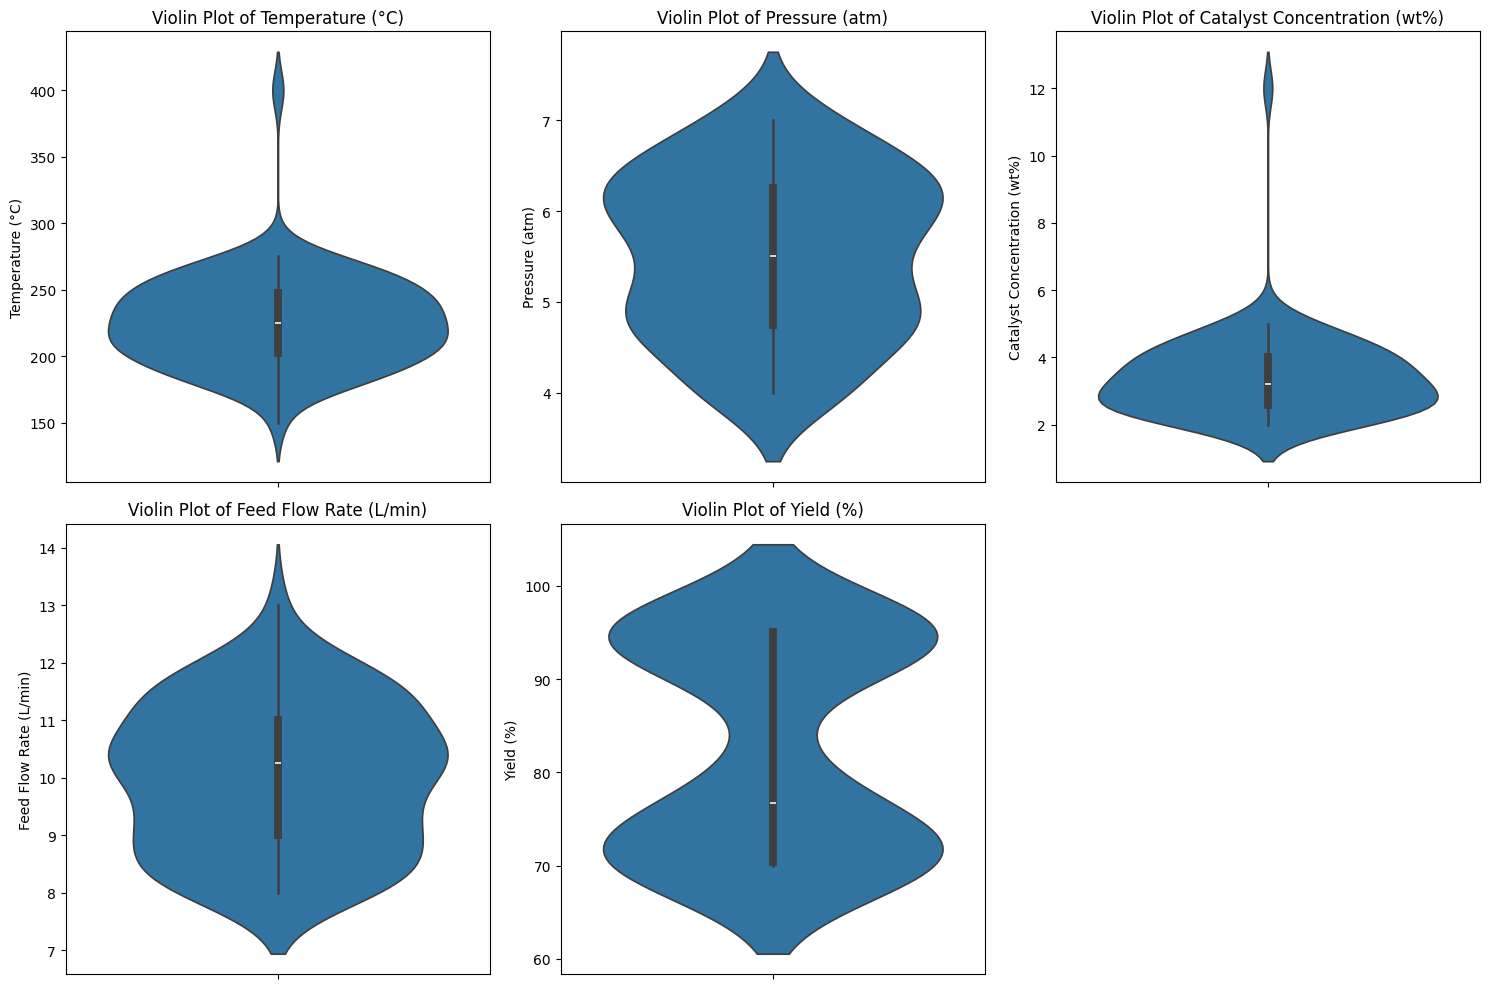

In [38]:
# prompt: do the same thing with violin plot instead of box plot


plt.figure(figsize=(15, 10))
for i, var in enumerate(dfnum3.columns):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df[var])
    plt.title(f'Violin Plot of {var}')
plt.tight_layout()
plt.show()

## Data Visualization with Histogram plot

array([[<Axes: title={'center': 'Temperature (°C)'}>,
        <Axes: title={'center': 'Pressure (atm)'}>],
       [<Axes: title={'center': 'Catalyst Concentration (wt%)'}>,
        <Axes: title={'center': 'Feed Flow Rate (L/min)'}>],
       [<Axes: title={'center': 'Yield (%)'}>, <Axes: >]], dtype=object)

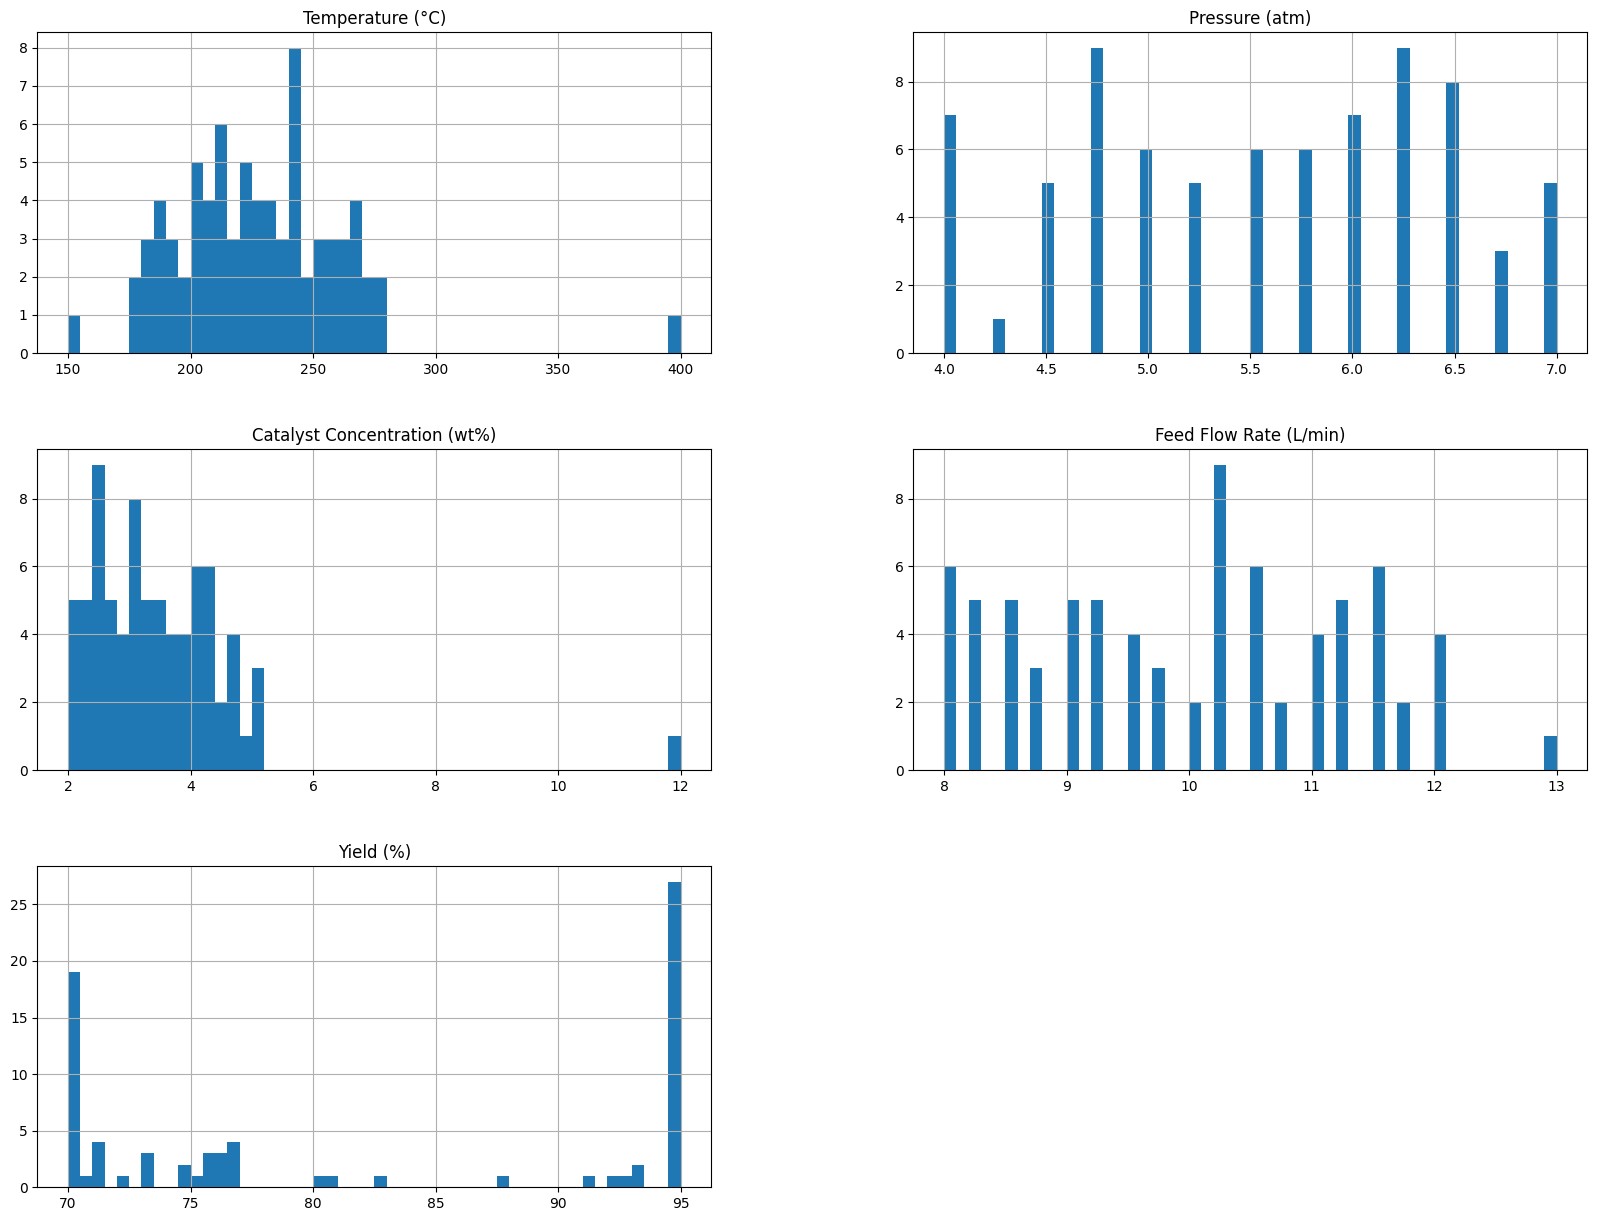

In [39]:
dfnum3.hist(bins=50, figsize=(20,15))

## Check Correlations

In [40]:
# prompt: print correlations matrix and do a plot a heatmap of correlation

# calculate correlations
correlations = dfnum3.corr()

# print correlations matrix
correlations


,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
Temperature (°C),1.000000,-0.098961,-0.253425,-0.091075,0.192348
Pressure (atm),-0.098961,1.000000,0.009847,-0.070233,0.008904
Catalyst Concentration (wt%),-0.253425,0.009847,1.000000,0.146602,0.006858
Feed Flow Rate (L/min),-0.091075,-0.070233,0.146602,1.000000,-0.072837
Yield (%),0.192348,0.008904,0.006858,-0.072837,1.000000


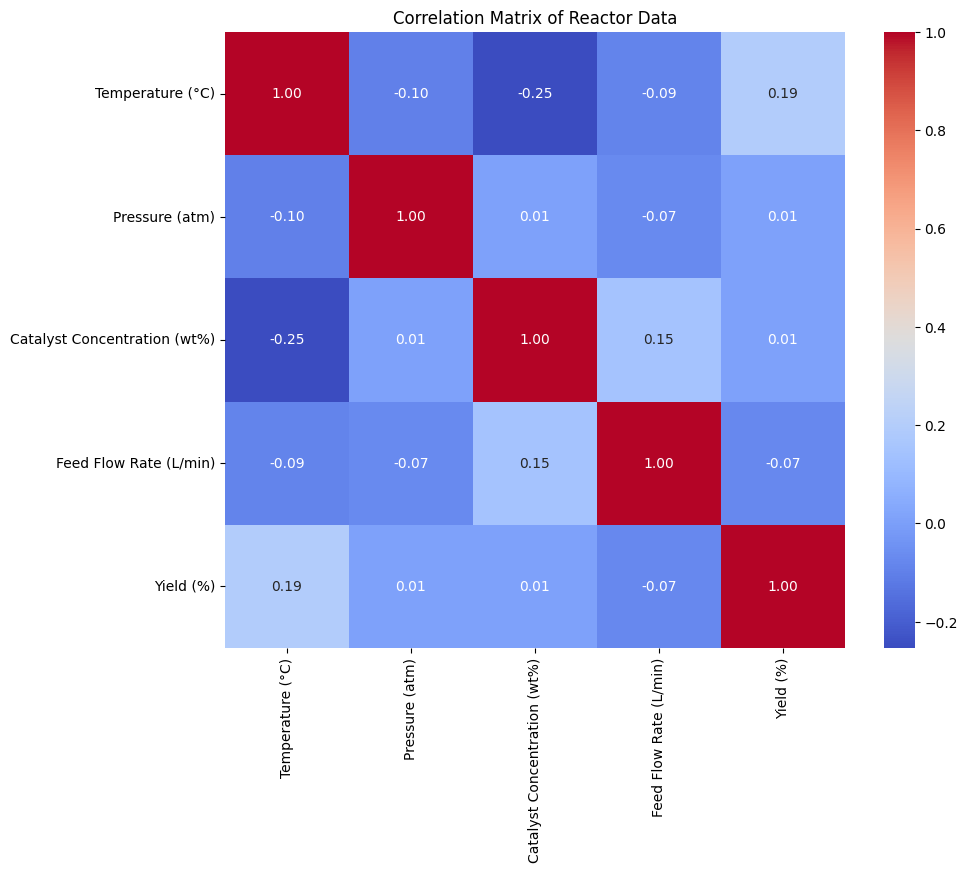

In [41]:
# plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Reactor Data')
plt.show()

# Outliers

**Strategy:** Based on the investigation and domain knowledge, these outliers are false reading and hence will be removed based on the operating conditions

In [42]:
# prompt: here are the operating conditions. anything outside is an outlier. can you help filter them? show dfnum3 shape before and after outlier removal.

# Outlier Removal
# Define the operating conditions (min and max values for each column)
operating_conditions = {
    'Temperature (°C)': (175,275),
    'Pressure (atm)': (4,7),
    'Catalyst Concentration (wt%)': (2,5),
    'Feed Flow Rate (L/min)': (8,12),
}

print(f"Shape before outlier removal: {dfnum3.shape}")

# Filter the DataFrame based on operating conditions
dfnum3_filtered = dfnum3.copy()
for column, (lower, upper) in operating_conditions.items():
    dfnum3_filtered = dfnum3_filtered[
        (dfnum3_filtered[column] >= lower) & (dfnum3_filtered[column] <= upper)
    ]

dfcleaned = dfnum3_filtered

print(f"Shape after outlier removal: {dfcleaned.shape}")

Shape before outlier removal: (77, 5)
Shape after outlier removal: (75, 5)


## Histogram plot with cleaned data

array([[<Axes: title={'center': 'Temperature (°C)'}>,
        <Axes: title={'center': 'Pressure (atm)'}>],
       [<Axes: title={'center': 'Catalyst Concentration (wt%)'}>,
        <Axes: title={'center': 'Feed Flow Rate (L/min)'}>],
       [<Axes: title={'center': 'Yield (%)'}>, <Axes: >]], dtype=object)

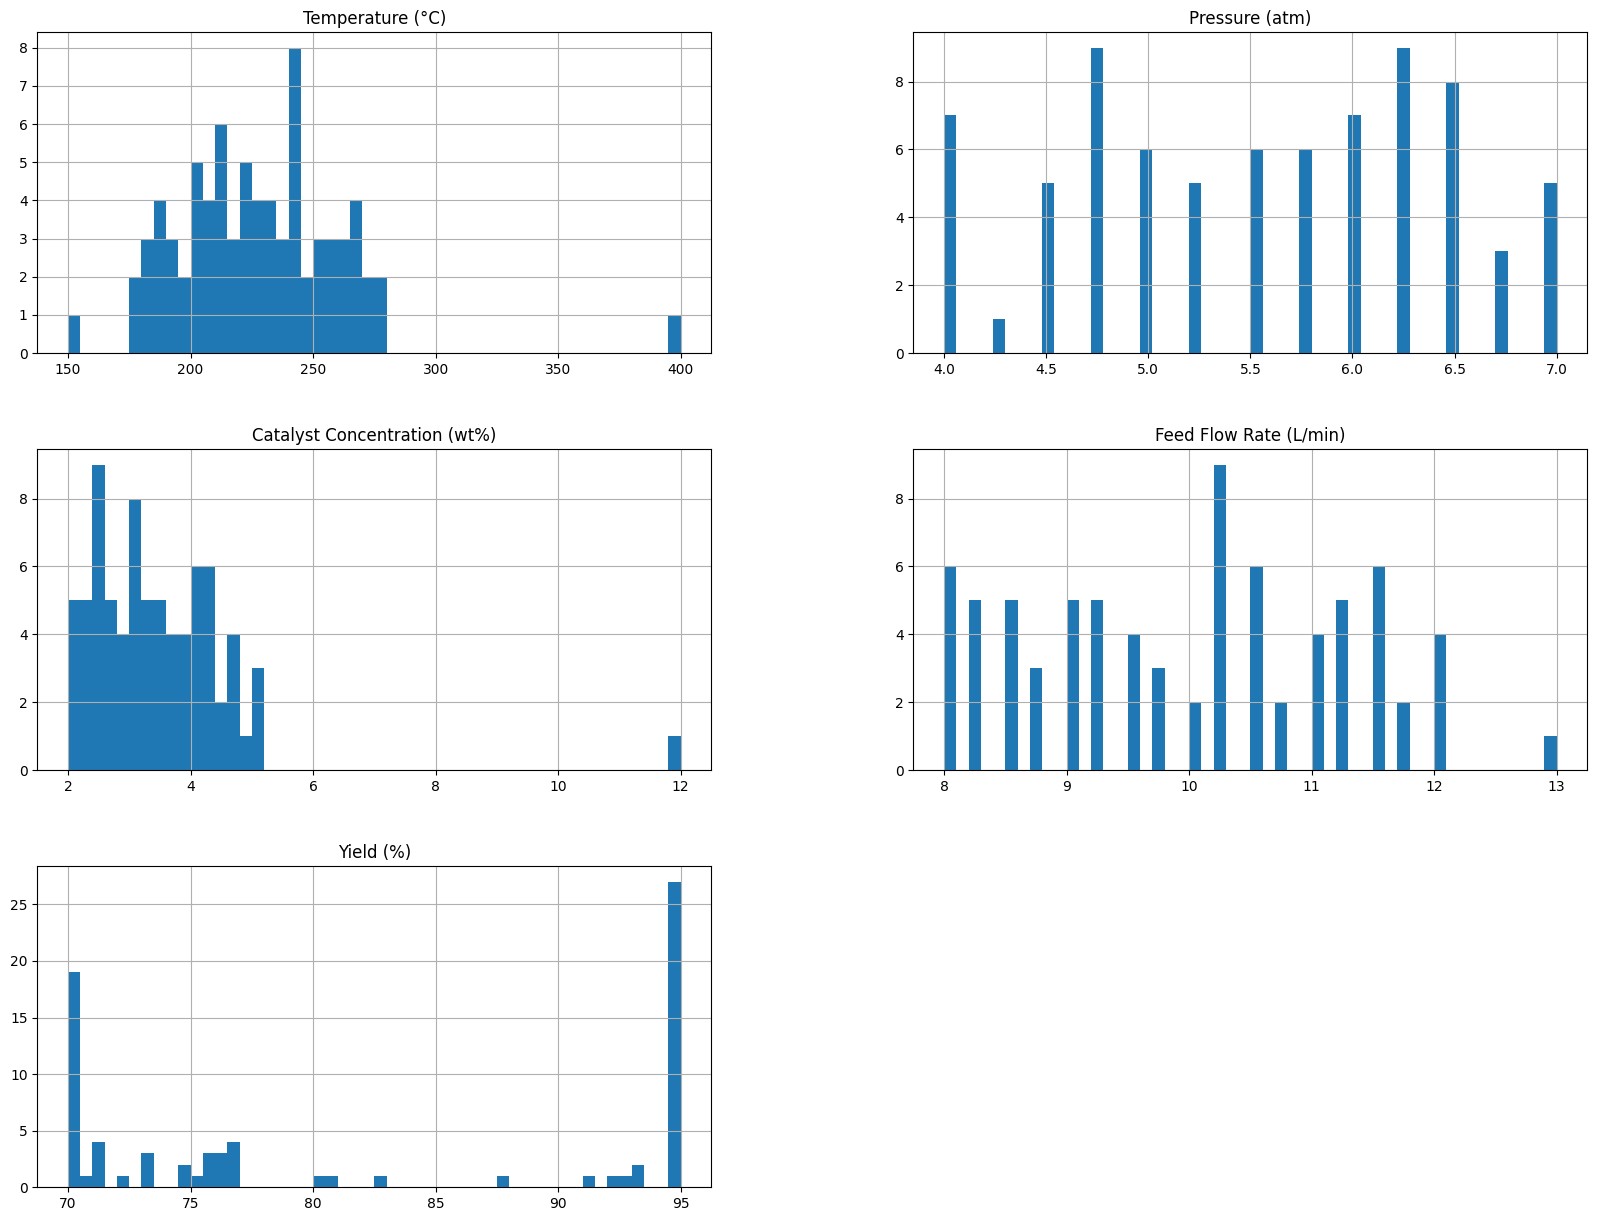

In [43]:
dfnum3.hist(bins=50, figsize=(20,15))

# ML Pipeline

## Normalization

In [44]:
# prompt: normalize the data using min-max scaling for dfcleaned. create a new df called dfnorm

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfnorm = pd.DataFrame(scaler.fit_transform(dfcleaned), columns=dfcleaned.columns)
dfnorm

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
0,0.30,0.333333,0.133333,0.3750,0.0000
1,0.25,0.333333,0.033333,0.2500,0.0000
2,0.50,0.666667,0.333333,0.5625,0.2300
3,0.25,0.666667,0.133333,0.6250,0.0000
4,0.45,0.833333,0.333333,0.3750,1.0000
...,...,...,...,...,...
70,0.45,0.500000,0.366667,0.8750,1.0000
71,0.10,0.666667,0.066667,0.9375,0.4304
72,0.25,0.000000,0.266667,0.1875,0.2672
73,0.90,0.166667,0.066667,0.5625,0.8440


## Visualize normalized data

array([[<Axes: title={'center': 'Temperature (°C)'}>,
        <Axes: title={'center': 'Pressure (atm)'}>],
       [<Axes: title={'center': 'Catalyst Concentration (wt%)'}>,
        <Axes: title={'center': 'Feed Flow Rate (L/min)'}>],
       [<Axes: title={'center': 'Yield (%)'}>, <Axes: >]], dtype=object)

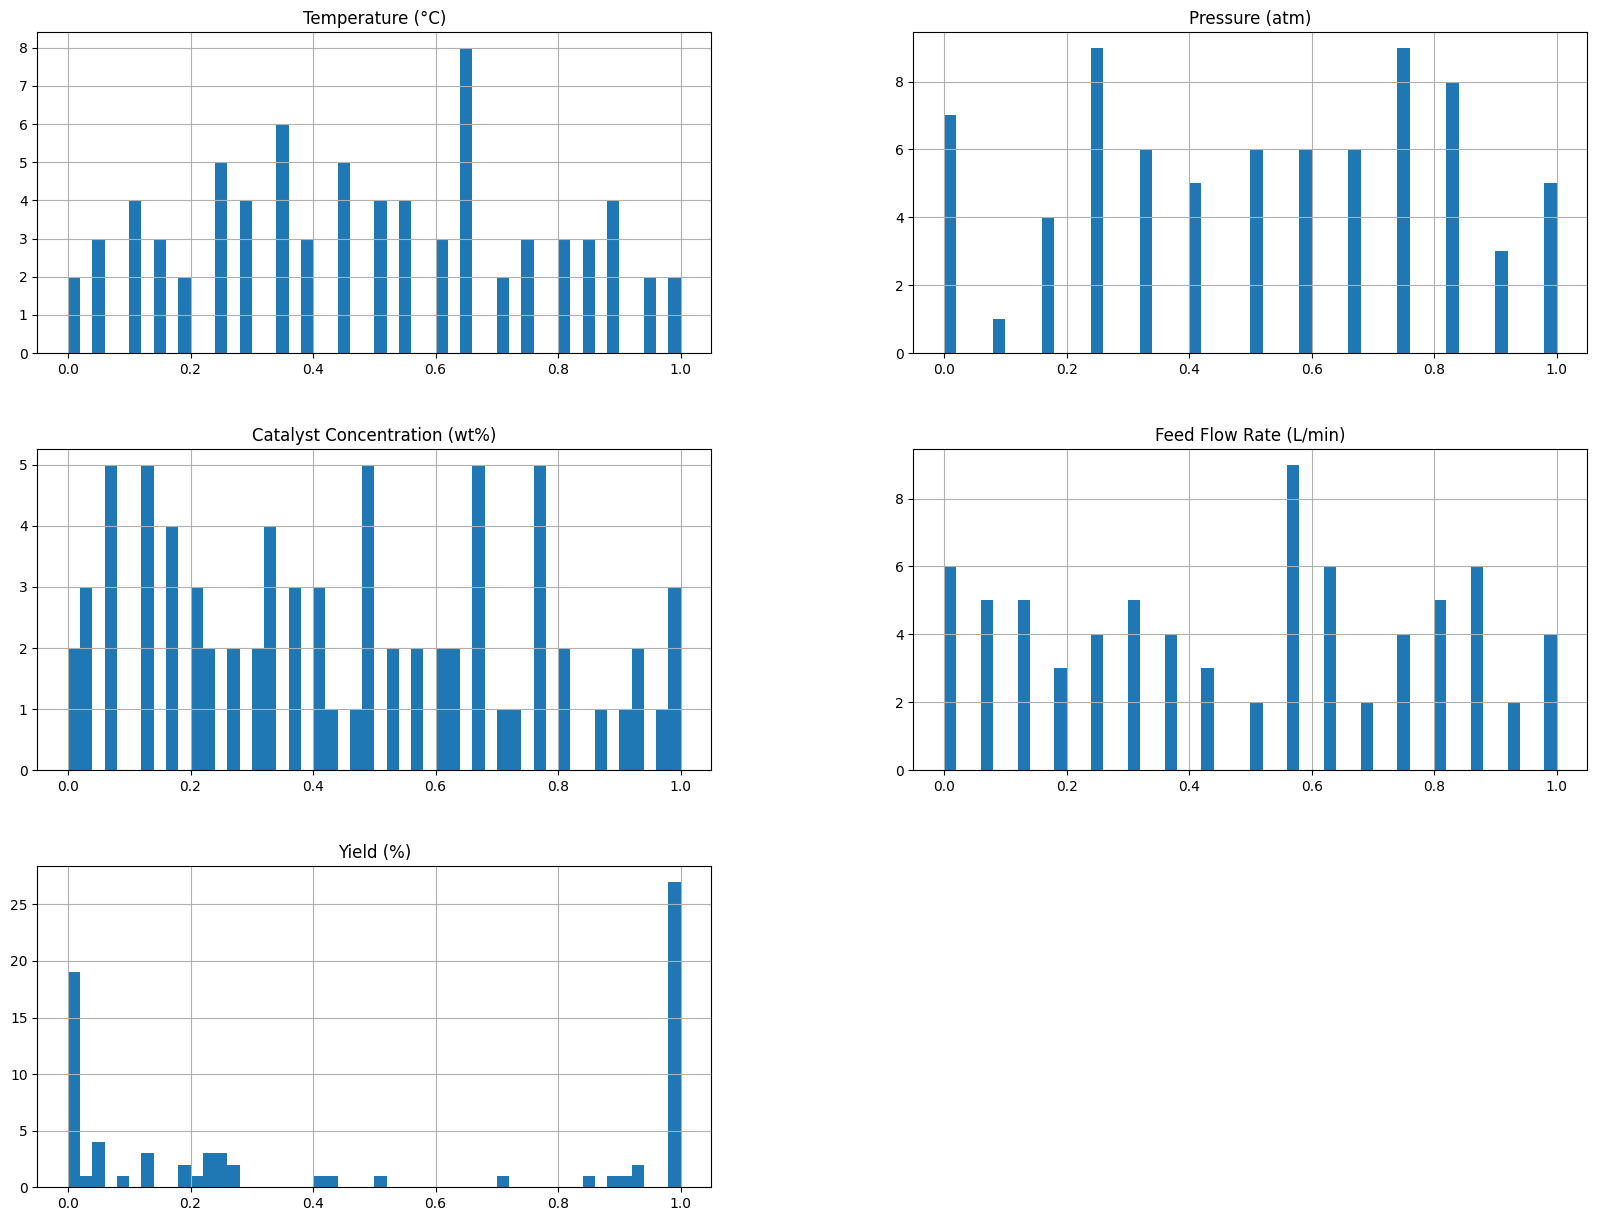

In [45]:
dfnorm.hist(bins=50, figsize=(20,15))

## Data Split

In [46]:
# prompt: split data to train and test with 70/30 strategy

X = dfnorm[['Temperature (°C)', 'Pressure (atm)', 'Catalyst Concentration (wt%)', 'Feed Flow Rate (L/min)']]
y = dfnorm['Yield (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (52, 4)
Shape of X_test: (23, 4)
Shape of y_train: (52,)
Shape of y_test: (23,)


# Random Forest Model

## Grid Search for Hyper parameter tuning

In [47]:
# prompt: create grid search to build a RF model. show the training RMSE, R2 and test RMSE, R2. Show the best model and hyper parameters

from sklearn.metrics import mean_squared_error
import math

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                            param_grid=param_grid,
                            cv=5,  # 5-fold cross-validation
                            scoring='neg_mean_squared_error', # Use negative MSE to maximize
                            n_jobs=-1) # Use all available cores

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the training set
y_train_pred_rf = best_rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate RMSE and R2 for the training set
train_rmse_rf = math.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculate RMSE and R2 for the test set
test_rmse_rf = math.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Training R2: {train_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Test R2: {test_r2_rf:.4f}")
print("\nBest Random Forest Model Hyperparameters:")
grid_search_rf.best_params_

Random Forest Model Evaluation:
Training RMSE: 0.3127
Training R2: 0.4723
Test RMSE: 0.4760
Test R2: -0.0224

Best Random Forest Model Hyperparameters:


{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

## Final model with optimized paramters

In [ ]:
# prompt: lets build xgboost model with hyper parameter optimization

# ## XGBoost Model
# ## Grid Search for Hyper parameter tuning

# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Initialize the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                             param_grid=param_grid_xgb,
                             cv=5,  # 5-fold cross-validation
                             scoring='neg_mean_squared_error', # Use negative MSE to maximize
                             n_jobs=-1) # Use all available cores

# Fit the grid search to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the training set
y_train_pred_xgb = best_xgb_model.predict(X_train)

# Make predictions on the test set
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate RMSE and R2 for the training set
train_rmse_xgb = math.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

# Calculate RMSE and R2 for the test set
test_rmse_xgb = math.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Training RMSE: {train_rmse_xgb:.4f}")
print(f"Training R2: {train_r2_xgb:.4f}")
print(f"Test RMSE: {test_rmse_xgb:.4f}")
print(f"Test R2: {test_r2_xgb:.4f}")
print("\nBest XGBoost Model Hyperparameters:")
grid_search_xgb.best_params_
